In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import (nc_tools, viz_tools, gsw_calls)
import numpy.ma as ma
from matplotlib import animation, rc
%matplotlib inline

In [2]:
rc('animation', html='html5')

In [38]:
mesh_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
new_domain = mesh_mask.variables['tmask'][0,:,334:898,114:398]   
def calc_rho(Sal, TempC, P):
    sqrSal = np.sqrt(Sal)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    return rho
def animate_one_density(file1,file2, rho):
    depth = file1.variables['deptht'][:]
    saline1 = file1.variables['vosaline'][:]
    temp1 = file1.variables['votemper'][:]
    saline2 = file1.variables['vosaline'][:]
    temp2 = file1.variables['votemper'][:]
    a = np.expand_dims(depth, 1).T
    b = np.expand_dims(np.expand_dims(a,2), 3)
    c = np.ones((155,40,564, 284)) * b
    density1 = calc_rho(saline1, temp1, c)
    index1 = (np.abs(density1 - rho)).argmin(axis=1)
    density2 = calc_rho(saline2, temp2, c)
    index2 = (np.abs(density2 - rho)).argmin(axis=1)
    list_of_depths1 = np.zeros((155,564,284))
    for t in range(155):
        for y in range(564):
            for x in range(284):
                list_of_depths1[t,y,x] = depth[index1[t,y,x]]
    list_of_depths2 = np.zeros((155,564,284))
    for t in range(155):
        for y in range(564):
            for x in range(284):
                list_of_depths2[t,y,x] = depth[index2[t,y,x]]
    mask_land = 1 - new_domain[0,:,:]
    fig,ax = plt.subplots(1,2,figsize=(8,8))
    def animate30(i):
        ax[0].clear()
        masked_depths1 = ma.masked_array(list_of_depths1[i,:,:], mask = mask_land)
        ax[0].contourf(masked_depths1, 
                      levels = np.linspace(0, 65, 8))
        ax[0].set_title('hour = %03d'%(i)) 
        ax[1].clear()
        masked_depths2 = ma.masked_array(list_of_depths2[i,:,:], mask = mask_land)
        ax[1].contourf(masked_depths2, 
                      levels = np.linspace(0, 65, 8))
        ax[1].set_title('hour = %03d'%(i)) 
        return ax

    interval = 0.25#in seconds
    ani40 = animation.FuncAnimation(fig,animate30,frames=155,interval=interval*1e+3, repeat=False)
    return ani40

In [4]:
NU0 =nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/NU0/SalishSea_1h_20170101_20170107_grid_T.nc')
NU02 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/NU0.2/SalishSea_1h_20170101_20170107_grid_T.nc')
NG0 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/NG0/SalishSea_1h_20170101_20170107_grid_T.nc')
NG02 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/NG0.2/SalishSea_1h_20170101_20170107_grid_T.nc')
NS0 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/NS0/SalishSea_1h_20170101_20170107_grid_T.nc')
NS02 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/NS0.2/SalishSea_1h_20170101_20170107_grid_T.nc')

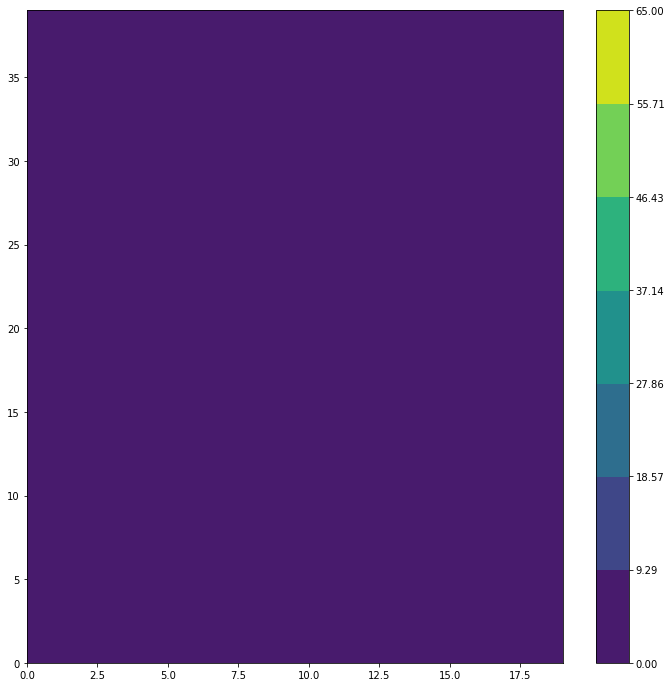

In [37]:
fig,ax = plt.subplots(1,2,figsize=(12,12))
#masked_depths1 = ma.masked_array(list_of_depths1[70,:,:], mask = mask_land)
den = ax[0].contourf(np.ones((40,20)), levels = np.linspace(0, 65, 8))
fig.colorbar(den, ax=ax[0])
den = ax[1].contourf(np.ones((40,20)), levels = np.linspace(0, 58, 8))
fig.colorbar(den, ax=ax[1])

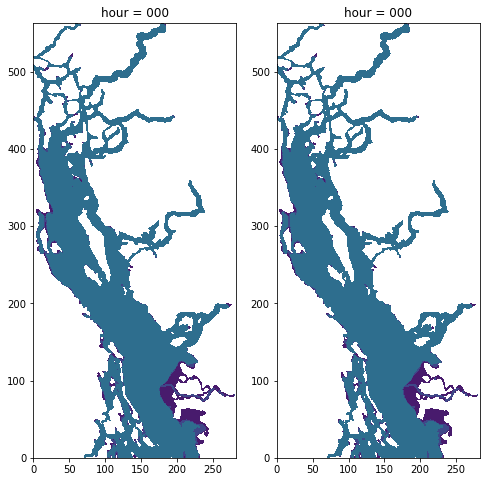

In [39]:
animate_one_density(NU0,NU02,1023.3)

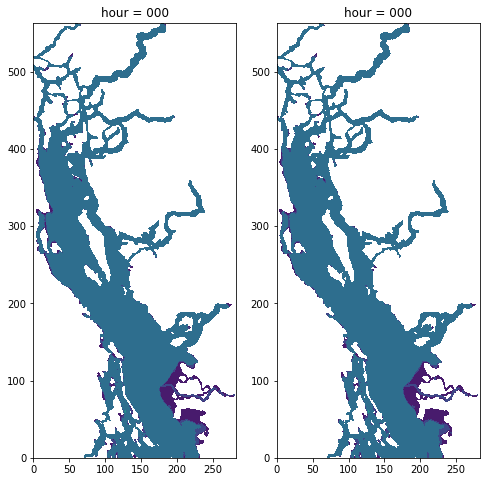

In [6]:
animate_one_density(NG0,NG02,1023.3)

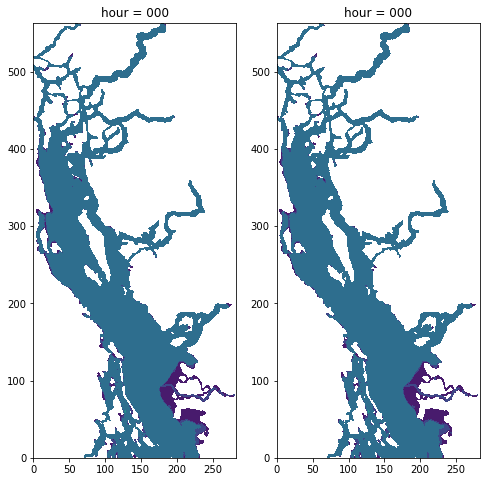

In [7]:
animate_one_density(NS0,NS02,1023.3)

In [8]:
SU0 =nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/SU0/SalishSea_1h_20160601_20160607_grid_T.nc')
SU02 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/SU0.2/SalishSea_1h_20160601_20160607_grid_T.nc')
SG0 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/SG0/SalishSea_1h_20160601_20160607_grid_T.nc')
SG02 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/SG0.2/SalishSea_1h_20160601_20160607_grid_T.nc')
SS0 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/SS0/SalishSea_1h_20160601_20160607_grid_T.nc')
SS02 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/SS0.2/SalishSea_1h_20160601_20160607_grid_T.nc')

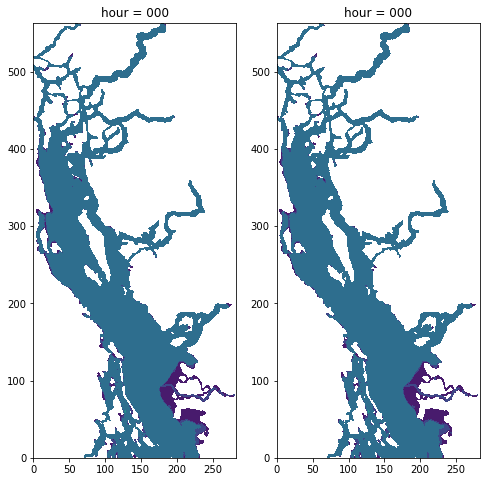

In [9]:
animate_one_density(SU0,SU02,1023.3)

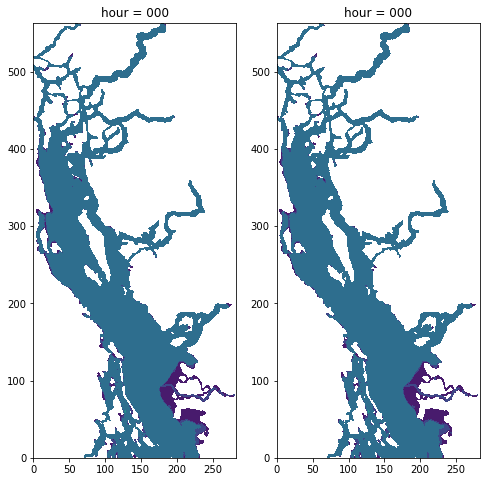

In [10]:
animate_one_density(SG0,SG02,1023.3)

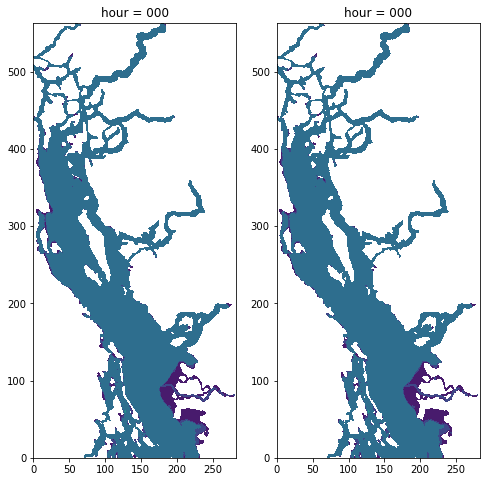

In [11]:
animate_one_density(SS0,SS02,1023.3)

In [23]:
V = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/NU0/SalishSea_1h_20170101_20170107_grid_V.nc')

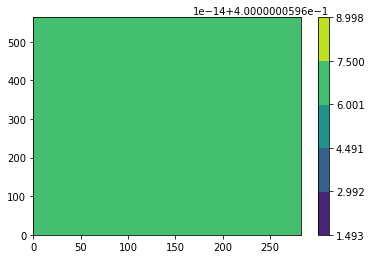

In [24]:
plt.contourf(V.variables['vtau'][55,:,:])
plt.colorbar()

In [12]:
C0 =nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/C0/SalishSea_1h_20170101_20170107_grid_T.nc')
C02 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/C0.2/SalishSea_1h_20170101_20170107_grid_T.nc')
D0 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/D0/SalishSea_1h_20170101_20170107_grid_T.nc')
D02 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/D0.2/SalishSea_1h_20170101_20170107_grid_T.nc')

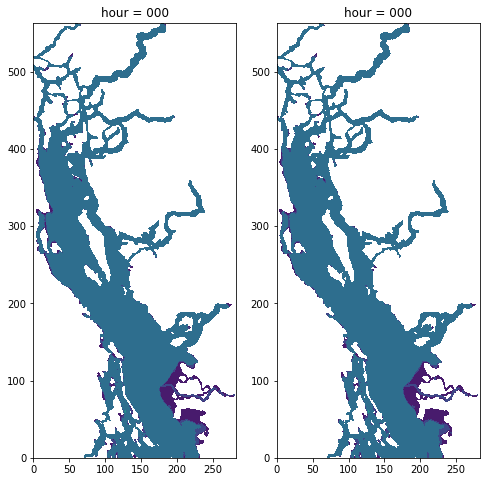

In [13]:
animate_one_density(C0,C02,1023.3)

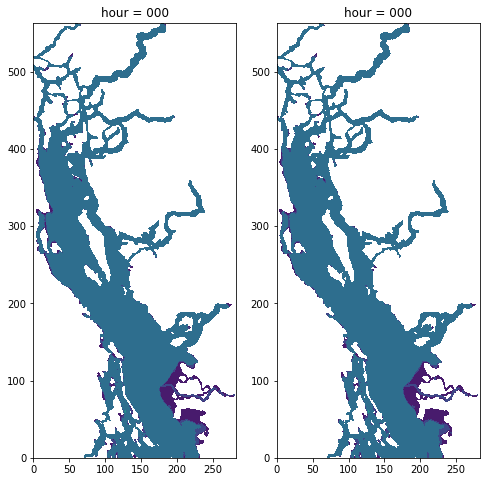

In [15]:
animate_one_density(D0,D02,1023.3)